# Sparks Foundation

**- Ankit Shah**

**Prediction using Unsupervised ML**

**Goal-** From the given ‘iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#importing Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#importing Dataset
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
#checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Finding Optimal Number Of Cluster**

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


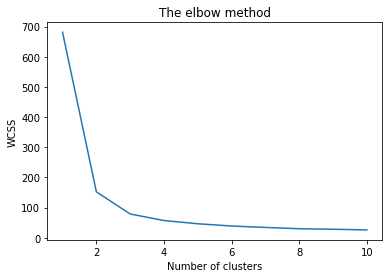

In [6]:
X = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Training the Model with optimal number of clusters**

In [7]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

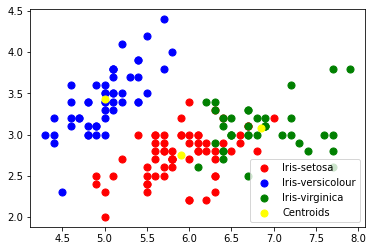

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()